In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Blueprinty Case Study

### Data

Read in data

In [2]:
blueprinty = pd.read_csv('blueprinty.csv')
blueprinty

,patents,region,age,iscustomer
0,0,Midwest,32.5,0
1,3,Southwest,37.5,0
2,4,Northwest,27.0,1
3,3,Northeast,24.5,0
4,3,Southwest,37.0,0
...,...,...,...,...
1495,2,Northeast,18.5,1
1496,3,Southwest,22.5,0
1497,4,Southwest,17.0,0
1498,3,South,29.0,0


Compare histograms and means of number of patents by customer status. What do you observe?

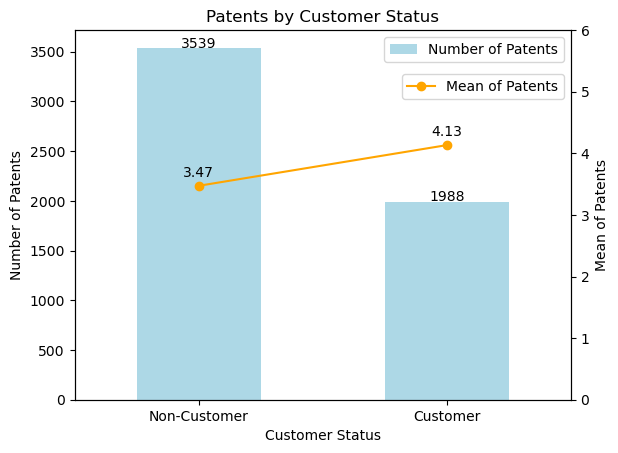

In [128]:
# Calculate the mean of patents by customer status
mean_patents_iscus = blueprinty.groupby('iscustomer')['patents'].mean()
patents_iscus = blueprinty.groupby('iscustomer')['patents'].sum()

# Plot the bar chart for the count of patents
fig, ax1 = plt.subplots()

patents_iscus.plot(kind='bar', color='lightblue', ax=ax1, label='Number of Patents')
ax1.set_title('Patents by Customer Status')
ax1.set_xlabel('Customer Status')
ax1.set_ylabel('Number of Patents')
ax1.set_xticks([0, 1])
ax1.set_xticklabels(['Non-Customer', 'Customer'], rotation=0)
ax1.legend(loc='upper right', bbox_to_anchor=(1, 1))

# Plot the line chart for the mean of patents
ax2 = ax1.twinx()
mean_patents_iscus.plot(kind='line', color='orange', marker='o', ax=ax2, label='Mean of Patents')
ax2.set_ylim(0, 6)
ax2.set_ylabel('Mean of Patents')
ax2.legend(loc='upper right', bbox_to_anchor=(1, 0.9))

# Add data labels to the bars
for i in range(len(patents_iscus)):
    plt.text(i, patents_iscus[i]*0.0016, f"{patents_iscus[i]}", ha='center', va='bottom')
for j in range(len(mean_patents_iscus)):
    plt.text(j, mean_patents_iscus[j]+0.1, f"{round(mean_patents_iscus[j],2)}", ha='center', va='bottom')
plt.show()

Compare regions and ages by customer status. What do you observe?

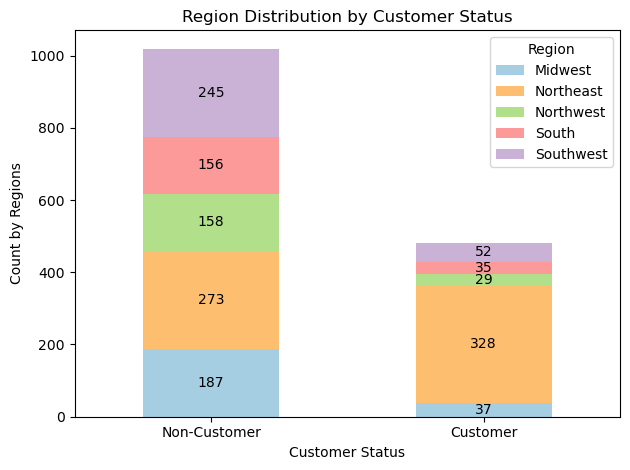

In [103]:
pastel_colors = ['#A6CEE3', '#FDBF6F', '#B2DF8A', '#FB9A99', '#CAB2D6']
region_iscus = blueprinty.groupby('iscustomer')['region'].value_counts().unstack()
region_iscus.plot(kind='bar', stacked=True, color=pastel_colors)
plt.title('Region Distribution by Customer Status')
plt.xlabel('Customer Status')
plt.ylabel('Count by Regions')
plt.xticks([0, 1], ['Non-Customer', 'Customer'], rotation=0)
plt.legend(title='Region', bbox_to_anchor=(1, 1))

# Add data labels to the middle of the bars
for i in range(len(region_iscus)):
    cumulative_height = 0
    for j in range(len(region_iscus.columns)):
        height = region_iscus.iloc[i, j]
        if height > 0:
            plt.text(i, cumulative_height + height / 2, f"{height}", ha='center', va='center')
        cumulative_height += height

plt.tight_layout()
plt.show()

/tmp/ipykernel_44952/2703104569.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_iscus = blueprinty.groupby(['iscustomer', 'age_group'])['age'].count().unstack()


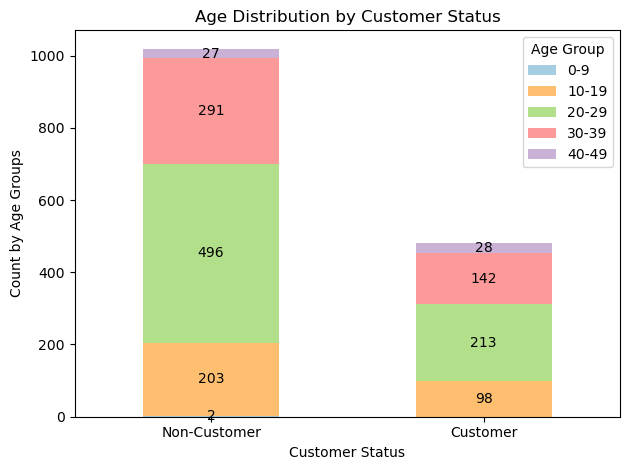

In [101]:
# Create bins for ten-year age intervals
bins = range(0, int(blueprinty['age'].max()) + 10, 10)
labels = [f"{i}-{i+9}" for i in bins[:-1]]

# Add a new column for age groups
blueprinty['age_group'] = pd.cut(blueprinty['age'], bins=bins, labels=labels, right=False)

# Regroup the data by age groups and customer status
pastel_colors = ['#A6CEE3', '#FDBF6F', '#B2DF8A', '#FB9A99', '#CAB2D6']
age_group_iscus = blueprinty.groupby(['iscustomer', 'age_group'])['age'].count().unstack()
age_group_iscus.plot(kind='bar', stacked=True, color=pastel_colors)
plt.title('Age Distribution by Customer Status')
plt.xlabel('Customer Status')
plt.ylabel('Count by Age Groups')
plt.xticks([0, 1], ['Non-Customer', 'Customer'], rotation=0)
plt.legend(title='Age Group', bbox_to_anchor=(1, 1))
# Add data labels to the middle of the bars 
for i in range(len(age_group_iscus)):
    cumulative_height = 0
    for j in range(len(age_group_iscus.columns)):
        height = age_group_iscus.iloc[i, j]
        if height > 0:
            plt.text(i, cumulative_height + height / 2, f"{height}", ha='center', va='center')
        cumulative_height += height
plt.tight_layout()

### Estimation of Simple Poisson Model

Write down mathematically the likelihood for_ $Y \sim \text{Poisson}(\lambda)$. Note that $f(Y|\lambda) = e^{-\lambda}\lambda^Y/Y!$.


$$
\log L(\lambda) = \sum_{i=1}^{n} \left( -\lambda + Y_i \log(\lambda) - \log(Y_i!) \right)
$$


Code the likelihood (or log-likelihood) function for the Poisson model. This is a function of lambda and Y. For example:

In [106]:
import numpy as np
import pandas as pd
from scipy.special import gammaln

# target variable
Y_data = blueprinty['patents'].values  

# define the Poisson log-likelihood function
def poisson_loglikelihood(lmbda, Y):
    Y = np.array(Y)
    return np.sum(Y * np.log(lmbda) - lmbda - gammaln(Y + 1))

# test example
print("log-likelihood at λ=3.0:", poisson_loglikelihood(3.0, Y_data))

log-likelihood at λ=3.0: -3476.8568706008004


Use your function to plot lambda on the horizontal axis and the likelihood (or log-likelihood) on the vertical axis for a range of lambdas (use the observed number of patents as the input for Y).

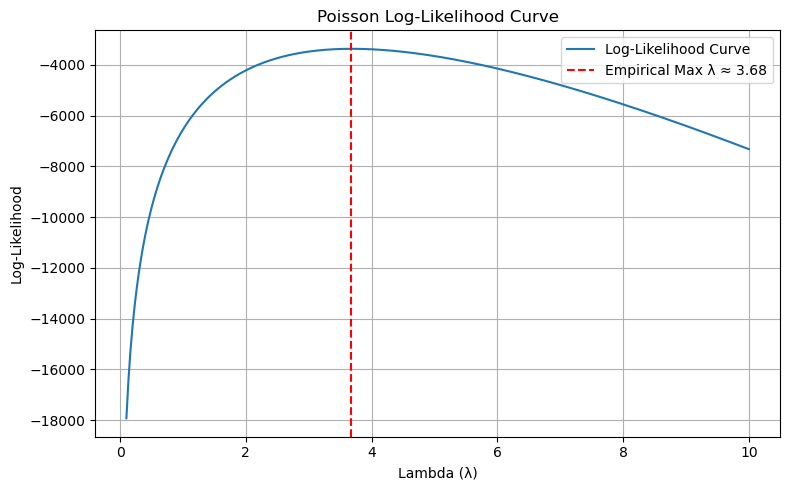

In [108]:
import matplotlib.pyplot as plt

# Create a range of lambda values
lambda_range = np.linspace(0.1, 10, 300)

# Compute log-likelihood for each lambda
loglik_values = [poisson_loglikelihood(lmb, Y_data) for lmb in lambda_range]

# Find the lambda that gives the maximum log-likelihood
lambda_mle_empirical = lambda_range[np.argmax(loglik_values)]

# Plot the curve
plt.figure(figsize=(8, 5))
plt.plot(lambda_range, loglik_values, label="Log-Likelihood Curve")
plt.axvline(lambda_mle_empirical, color="red", linestyle="--", label=f"Empirical Max λ ≈ {lambda_mle_empirical:.2f}")
plt.xlabel("Lambda (λ)")
plt.ylabel("Log-Likelihood")
plt.title("Poisson Log-Likelihood Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

If you're feeling mathematical, take the first derivative of your likelihood or log-likelihood, set it equal to zero and solve for lambda. You will find lambda_mle is Ybar, which "feels right" because the mean of a Poisson distribution is lambda.

In [109]:
# Compute theoretical MLE as the sample mean
lambda_mle_theory = np.mean(Y_data)
print(f"Theoretical MLE λ = mean(Y) = {lambda_mle_theory:.4f}")

Theoretical MLE λ = mean(Y) = 3.6847


Find the MLE by optimizing your likelihood function with optim() in R or sp.optimize() in Python.

In [110]:
from scipy.optimize import minimize_scalar

# Find λ that maximizes the log-likelihood using numerical optimization
result = minimize_scalar(
    lambda lmb: -poisson_loglikelihood(lmb, Y_data),  # we minimize the negative log-likelihood
    bounds=(0.01, 20),
    method="bounded"
)

lambda_mle_optimized = result.x
print(f"Optimized MLE λ = {lambda_mle_optimized:.4f}")

Optimized MLE λ = 3.6847


### Estimation of Poisson Regression Model

Update your likelihood or log-likelihood function with an additional argument to take in a covariate matrix X. Also change the parameter of the model from lambda to the beta vector. In this model, lambda must be a positive number, so we choose the inverse link function g_inv() to be exp() so that_ $\lambda_i = e^{X_i'\beta}$. _For example:

In [111]:
import numpy as np
import pandas as pd
from scipy.special import gammaln
from scipy.optimize import minimize
import patsy


# Add age_squared feature

blueprinty["age_squared"] = blueprinty["age"] ** 2

# Construct model matrix X using patsy (includes intercept automatically)
y_data, X_design = patsy.dmatrices(
    'patents ~ age + age_squared + C(region) + iscustomer',
    data=blueprinty,
    return_type='dataframe'
)

# Extract matrix and response
X = np.asarray(X_design)
Y = blueprinty["patents"].values
param_names = X_design.design_info.column_names

# Define Poisson log-likelihood function with stable exp()
def poisson_regression_loglik(beta, Y, X):
    lin_pred = X @ beta
    lin_pred = np.clip(lin_pred, -20, 20)  # numerical stability
    lambda_i = np.exp(lin_pred)
    return -np.sum(Y * lin_pred - lambda_i - gammaln(Y + 1))

Use your function along with R's optim() or Python's sp.optimize() to find the MLE vector and the Hessian of the Poisson model with covariates. Specifically, the first column of X should be all 1's to enable a constant term in the model, and the subsequent columns should be age, age squared, binary variables for all but one of the regions, and the binary customer variable. Use the Hessian to find standard errors of the beta parameter estimates and present a table of coefficients and standard errors.

In [113]:
# Initial guess (zeros)
beta_init = np.zeros(X.shape[1])

# Minimize negative log-likelihood
result = minimize(
    poisson_regression_loglik,
    beta_init,
    args=(Y, X),
    method='BFGS',
    options={'disp': True}
)

# Extract coefficients
beta_mle = result.x

# Compute standard errors from inverse Hessian
hessian_inv = result.hess_inv
standard_errors = np.sqrt(np.diag(hessian_inv))

# Format output as DataFrame
regression_result = pd.DataFrame({
    'Coefficient': beta_mle,
    'Std. Error': standard_errors
}, index=param_names)

print(regression_result)

         Current function value: 3258.072164
         Iterations: 14
         Function evaluations: 804
         Gradient evaluations: 88
                        Coefficient  Std. Error
Intercept                 -0.509955    0.193037
C(region)[T.Northeast]     0.029159    0.046759
C(region)[T.Northwest]    -0.017578    0.057235
C(region)[T.South]         0.056567    0.056242
C(region)[T.Southwest]     0.050589    0.049609
age                        0.148702    0.014460
age_squared               -0.002972    0.000266
iscustomer                 0.207600    0.032939


/opt/conda/lib/python3.11/site-packages/scipy/optimize/_minimize.py:708: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


Check your results using R's glm() function or Python sm.GLM() function.

In [114]:
import statsmodels.api as sm

# Fit Poisson regression using statsmodels GLM
glm_poisson = sm.GLM(Y, X, family=sm.families.Poisson())
glm_results = glm_poisson.fit()

# Display regression summary (coefficients, standard errors, z-scores)
print(glm_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 1500
Model:                            GLM   Df Residuals:                     1492
Model Family:                 Poisson   Df Model:                            7
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3258.1
Date:                Wed, 07 May 2025   Deviance:                       2143.3
Time:                        00:40:42   Pearson chi2:                 2.07e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1360
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5089      0.183     -2.778      0.0

Interpret the results.

In [115]:
# Extract coefficients and confidence intervals
coef_table = glm_results.summary2().tables[1]

# Display key statistics
print(coef_table[['Coef.', 'Std.Err.', 'P>|z|']])

          Coef.  Std.Err.         P>|z|
const -0.508920  0.183179  5.464935e-03
x1     0.029170  0.043625  5.037205e-01
x2    -0.017575  0.053781  7.438327e-01
x3     0.056561  0.052662  2.828066e-01
x4     0.050576  0.047198  2.839141e-01
x5     0.148619  0.013869  8.539597e-27
x6    -0.002970  0.000258  1.131496e-30
x7     0.207591  0.030895  1.827509e-11


### Key Variable Interpretations:

1. **iscustomer** (whether the firm uses Blueprinty software):
- Coefficient: +0.208
- P-value < 0.001 → statistically significant
- In a Poisson regression, this means the expected patent count for users is:
$e^{0.208} \approx 1.23$ 

    This implies that firms using Blueprinty software have, on average, 23% more patents than those who do not.  


2. **age and age_squared:**
- age: +0.149 → older firms tend to have more patents
- age_squared: -0.003 → diminishing returns, the effect of age decreases as firms get older

    This suggests that patent counts increase with firm age, but at a decreasing rate.



3. **region:**
- Region dummy variables show only minor differences compared to the baseline (Midwest)
- Most region effects are not statistically significant, acting as control variables



### Summary:
- There is a significant positive association between using Blueprinty software and higher patent counts.
- Age is a meaningful predictor with diminishing marginal effects.
- Regional differences are minor and do not substantially influence model predictions.

What do you conclude about the effect of Blueprinty's software on patent success? Because the beta coefficients are not directly interpretable, it may help to create two fake datasets: X_0 and X_1 where X_0 is the X data but with iscustomer=0 for every observation and X_1 is the X data but with iscustomer=1 for every observation. Then, use X_0 and your fitted model to get the vector of predicted number of patents (y_pred_0) for every firm in the dataset, and use X_1 to get Y_pred_1 for every firm. Then subtract y_pred_1 minus y_pred_0 and take the average of that vector of differences.

In [116]:
# Copy design matrix
X_0 = X.copy()
X_1 = X.copy()

# Find column index of "iscustomer"
iscust_idx = X_design.design_info.column_names.index("iscustomer")

# Simulate everyone as non-customer (0)
X_0[:, iscust_idx] = 0

# Simulate everyone as customer (1)
X_1[:, iscust_idx] = 1

# Predict expected patent counts for both cases
y_pred_0 = glm_results.predict(X_0)
y_pred_1 = glm_results.predict(X_1)

# Compute average treatment effect
average_treatment_effect = np.mean(y_pred_1 - y_pred_0)
print(f"Average treatment effect of Blueprinty software: {average_treatment_effect:.4f}")

Average treatment effect of Blueprinty software: 0.7928


In [117]:
# Optional: summary table
import pandas as pd

pd.DataFrame({
    'Pred (iscustomer=0)': y_pred_0,
    'Pred (iscustomer=1)': y_pred_1,
    'Difference': y_pred_1 - y_pred_0
}).describe()

,Pred (iscustomer=0),Pred (iscustomer=1),Difference
count,1500.000000,1500.000000,1500.000000
mean,3.436219,4.228987,0.792768
std,0.586140,0.721368,0.135228
min,0.698603,0.859777,0.161174
25%,3.187149,3.922454,0.735305
50%,3.633079,4.471265,0.838186
75%,3.867802,4.760140,0.892338
max,4.081981,5.023732,0.941751


# AirBnB Case Study

Assume the number of reviews is a good proxy for the number of bookings. Perform some exploratory data analysis to get a feel for the data, handle or drop observations with missing values on relevant variables, build one or more models (e.g., a poisson regression model for the number of bookings as proxied by the number of reviews), and interpret model coefficients to describe variation in the number of reviews as a function of the variables provided.

In [118]:
airbnb = pd.read_csv('airbnb.csv')
airbnb

,Unnamed: 0,id,days,last_scraped,host_since,room_type,bathrooms,bedrooms,price,number_of_reviews,review_scores_cleanliness,review_scores_location,review_scores_value,instant_bookable
0,1,2515,3130,4/2/2017,9/6/2008,Private room,1.0,1.0,59,150,9.0,9.0,9.0,f
1,2,2595,3127,4/2/2017,9/9/2008,Entire home/apt,1.0,0.0,230,20,9.0,10.0,9.0,f
2,3,3647,3050,4/2/2017,11/25/2008,Private room,1.0,1.0,150,0,NaN,NaN,NaN,f
3,4,3831,3038,4/2/2017,12/7/2008,Entire home/apt,1.0,1.0,89,116,9.0,9.0,9.0,f
4,5,4611,3012,4/2/2017,1/2/2009,Private room,NaN,1.0,39,93,9.0,8.0,9.0,t
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40623,40624,18008937,266,4/2/2017,7/10/2016,Entire home/apt,1.5,2.0,150,0,NaN,NaN,NaN,t
40624,40625,18009045,366,4/2/2017,4/1/2016,Private room,1.0,1.0,125,0,NaN,NaN,NaN,f
40625,40626,18009065,587,4/2/2017,8/24/2015,Private room,1.0,1.0,80,0,NaN,NaN,NaN,t
40626,40627,18009650,335,4/2/2017,5/2/2016,Private room,1.0,1.0,69,0,NaN,NaN,NaN,t


### Explorary data analysis

In [122]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40628 entries, 0 to 40627
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 40628 non-null  int64  
 1   id                         40628 non-null  int64  
 2   days                       40628 non-null  int64  
 3   last_scraped               40628 non-null  object 
 4   host_since                 40593 non-null  object 
 5   room_type                  40628 non-null  object 
 6   bathrooms                  40468 non-null  float64
 7   bedrooms                   40552 non-null  float64
 8   price                      40628 non-null  int64  
 9   number_of_reviews          40628 non-null  int64  
 10  review_scores_cleanliness  30433 non-null  float64
 11  review_scores_location     30374 non-null  float64
 12  review_scores_value        30372 non-null  float64
 13  instant_bookable           40628 non-null  obj

In [198]:
airbnb.describe()

,Unnamed: 0,id,days,bathrooms,bedrooms,price,number_of_reviews,review_scores_cleanliness,review_scores_location,review_scores_value
count,40628.000000,4.062800e+04,40628.000000,40468.000000,40552.000000,40628.000000,40628.000000,30433.000000,30374.000000,30372.000000
mean,20314.500000,9.698889e+06,1102.368219,1.124592,1.147046,144.760732,15.904426,9.198370,9.413544,9.331522
std,11728.437705,5.460166e+06,1383.269358,0.385884,0.691746,210.657597,29.246009,1.119935,0.844949,0.902966
min,1.000000,2.515000e+03,1.000000,0.000000,0.000000,10.000000,0.000000,2.000000,2.000000,2.000000
25%,10157.750000,4.889868e+06,542.000000,1.000000,1.000000,70.000000,1.000000,9.000000,9.000000,9.000000
50%,20314.500000,9.862878e+06,996.000000,1.000000,1.000000,100.000000,4.000000,10.000000,10.000000,10.000000
75%,30471.250000,1.466789e+07,1535.000000,1.000000,1.000000,170.000000,17.000000,10.000000,10.000000,10.000000
max,40628.000000,1.800967e+07,42828.000000,8.000000,10.000000,10000.000000,421.000000,10.000000,10.000000,10.000000


/tmp/ipykernel_44952/1378945223.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, room_type[i], f"{room_type[i]}", ha='center', va='bottom')


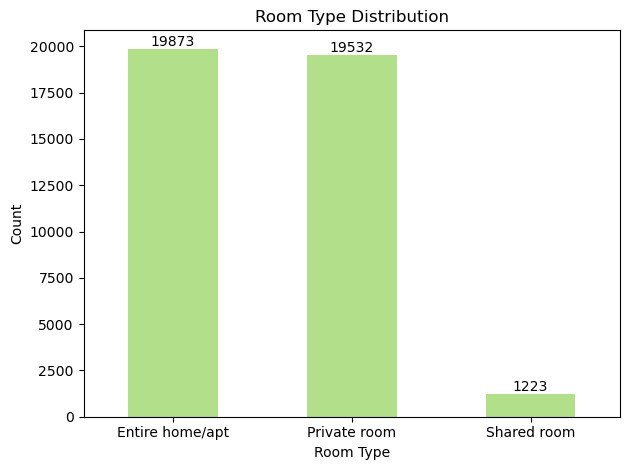

In [165]:
room_type = airbnb["room_type"].value_counts()
room_type.plot(kind='bar', color='#B2DF8A')
plt.title('Room Type Distribution')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
for i in range(len(room_type)):
    plt.text(i, room_type[i], f"{room_type[i]}", ha='center', va='bottom')
plt.tight_layout()
plt.show()

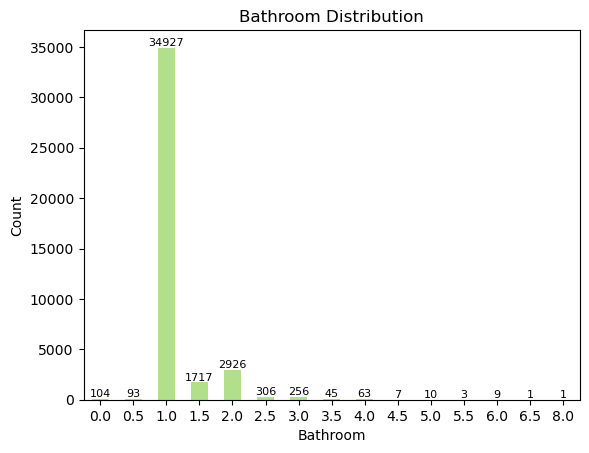

In [169]:
dbathroom = airbnb["bathrooms"].value_counts().sort_index()
dbathroom.plot(kind='bar', color='#B2DF8A')
plt.title('Bathroom Distribution')
plt.xlabel('Bathroom')
plt.ylabel('Count')
plt.xticks(rotation=0)
for i, (x, y) in enumerate(zip(dbathroom.index, dbathroom.values)):
    plt.text(i, y, f"{y}", ha='center', va='bottom', fontsize=8)
plt.show()

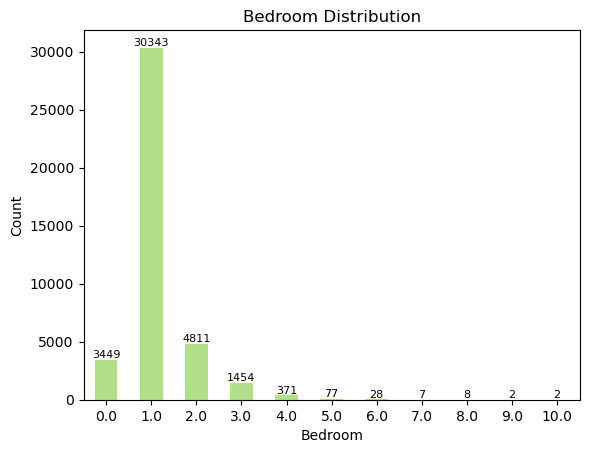

In [170]:
dbedroom = airbnb["bedrooms"].value_counts().sort_index()
dbedroom.plot(kind='bar', color='#B2DF8A')
plt.title('Bedroom Distribution')
plt.xlabel('Bedroom')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Add data labels aligned with the top of the bars
for i, (x, y) in enumerate(zip(dbedroom.index, dbedroom.values)):
    plt.text(i, y, f"{y}", ha='center', va='bottom', fontsize=8)

plt.show()

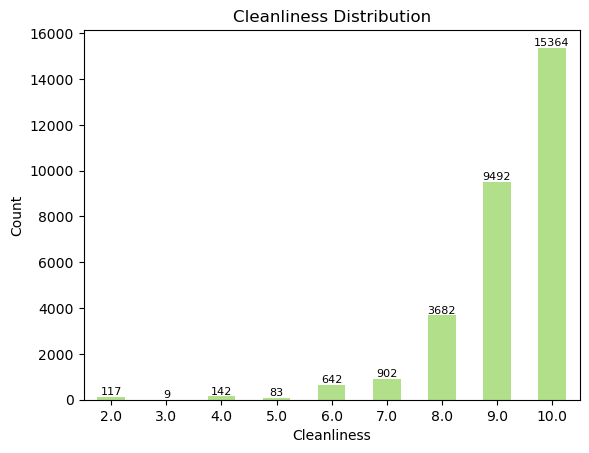

In [ ]:
d_cleanliness = airbnb["review_scores_cleanliness"].value_counts().sort_index()
d_cleanliness.plot(kind='bar', color='#B2DF8A')
plt.title('Cleanliness Distribution')
plt.xlabel('Cleanliness')
plt.ylabel('Count')
plt.xticks(rotation=0)
for i, (x, y) in enumerate(zip(d_cleanliness.index, d_cleanliness.values)):
    plt.text(i, y, f"{y}", ha='center', va='bottom', fontsize=8)
plt.show()

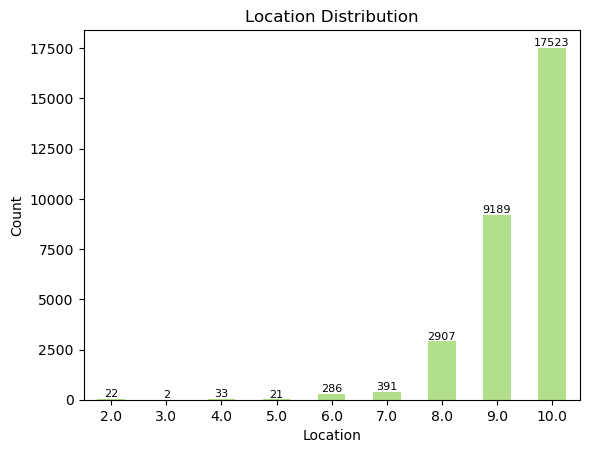

In [177]:
d_location = airbnb["review_scores_location"].value_counts().sort_index()
d_location.plot(kind='bar', color='#B2DF8A')
plt.title('Location Distribution')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=0)
for i, (x, y) in enumerate(zip(d_location.index, d_location.values)):
    plt.text(i, y, f"{y}", ha='center', va='bottom', fontsize=8)   
plt.show()

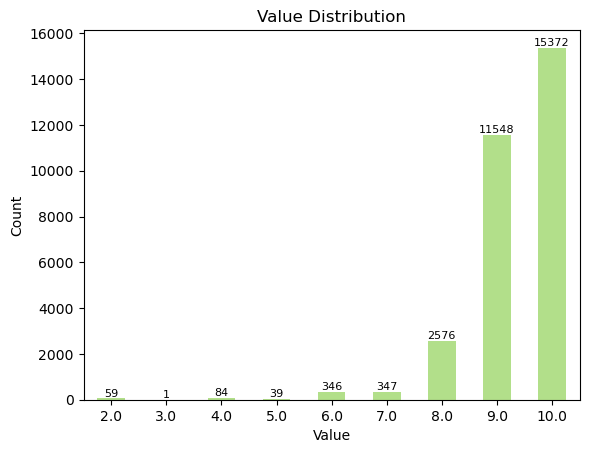

In [176]:
d_value = airbnb["review_scores_value"].value_counts().sort_index()
d_value.plot(kind='bar', color='#B2DF8A')
plt.title('Value Distribution')
plt.xlabel('Value')
plt.ylabel('Count')
plt.xticks(rotation=0)
# Add data labels aligned with the top of the bars
for i, (x, y) in enumerate(zip(d_value.index, d_value.values)):
    plt.text(i, y, f"{y}", ha='center', va='bottom', fontsize=8)
plt.show()

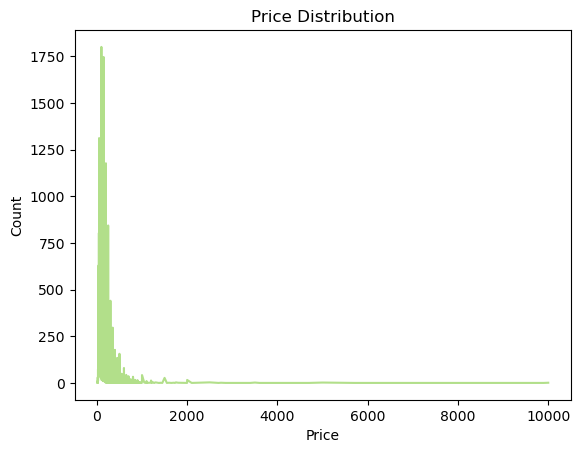

In [202]:
price = airbnb["price"].value_counts().sort_index()
price.plot(kind='line', color='#B2DF8A')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

/tmp/ipykernel_44952/2344399035.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, rtype_price[i] , f"{round(rtype_price[i], 2)}", ha='center', va='bottom')


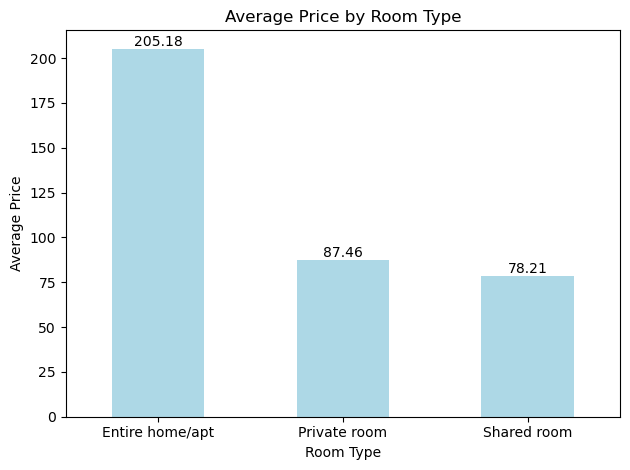

In [127]:
rtype_price = airbnb.groupby('room_type')['price'].mean()
rtype_price.plot(kind='bar', color='lightblue')
plt.title('Average Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.xticks(rotation=0)
for i in range(len(rtype_price)):
    plt.text(i, rtype_price[i] , f"{round(rtype_price[i], 2)}", ha='center', va='bottom')
plt.tight_layout()
plt.show()

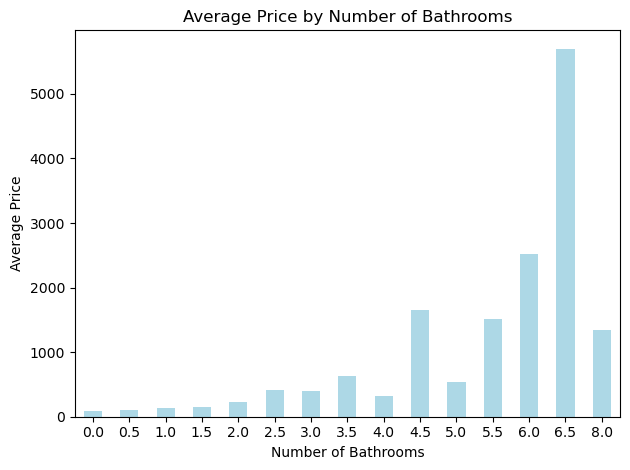

In [183]:
bathrooms_price = airbnb.groupby('bathrooms')['price'].mean()
bathrooms_price.plot(kind='bar', color='lightblue')
plt.title('Average Price by Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Average Price')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

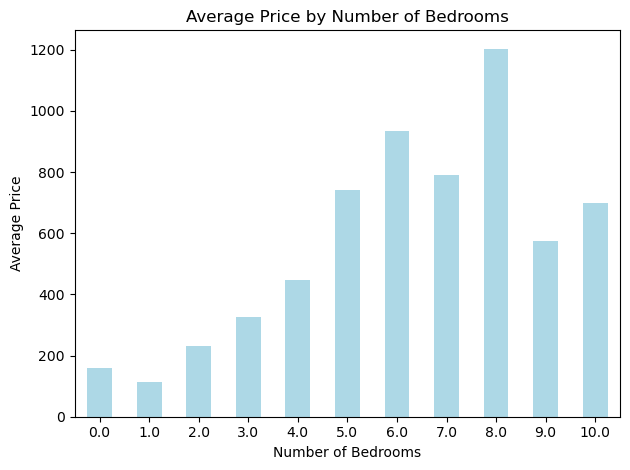

In [132]:
bedrooms_price = airbnb.groupby('bedrooms')['price'].mean()
bedrooms_price.plot(kind='bar', color='lightblue')
plt.title('Average Price by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Price')
plt.xticks(rotation=0)
plt.tight_layout()

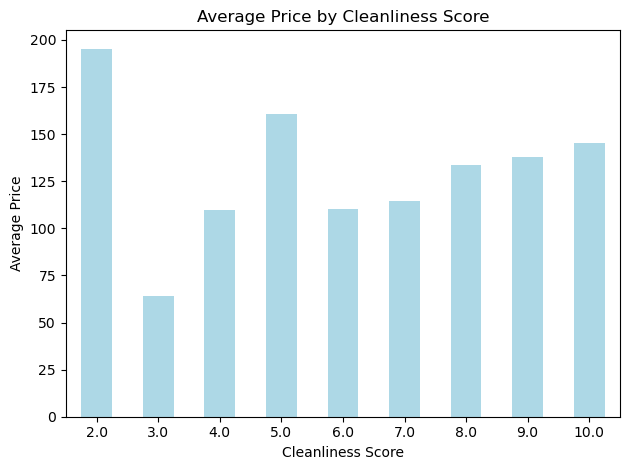

In [137]:
scleanliness_price = airbnb.groupby('review_scores_cleanliness')['price'].mean()
scleanliness_price.plot(kind='bar', color='lightblue')
plt.title('Average Price by Cleanliness Score')
plt.xlabel('Cleanliness Score')
plt.ylabel('Average Price')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

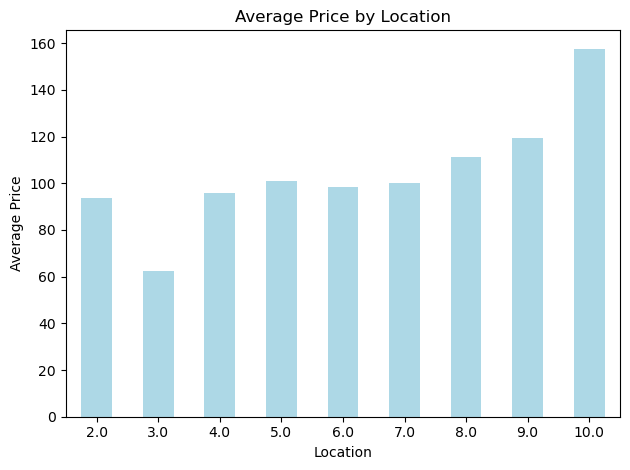

In [138]:
slocation_price = airbnb.groupby('review_scores_location')['price'].mean()
slocation_price.plot(kind='bar', color='lightblue')
plt.title('Average Price by Location')
plt.xlabel('Location')
plt.ylabel('Average Price')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

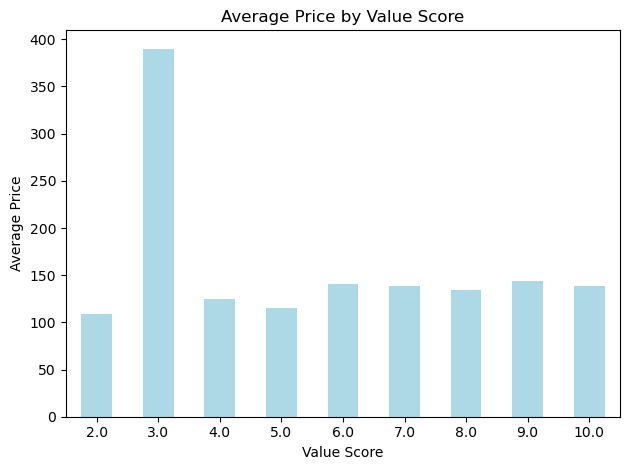

In [139]:
svalue_price = airbnb.groupby('review_scores_value')['price'].mean()
svalue_price.plot(kind='bar', color='lightblue')
plt.title('Average Price by Value Score')
plt.xlabel('Value Score')
plt.ylabel('Average Price')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Model building

In [203]:
import pandas as pd
import numpy as np
import patsy
import statsmodels.api as sm

# Load dataset

# Step 1: Select relevant variables
relevant_vars = ['number_of_reviews', 'bedrooms', 'bathrooms', 'room_type', 'price']

# Step 2: Drop rows with missing values in relevant variables
airbnb_clean = airbnb.dropna(subset=relevant_vars).copy()

# Step 3: Feature engineering
# Apply log-transform to skewed variable `price`
airbnb_clean['price_log'] = np.log1p(airbnb_clean['price'])  # log(1 + price) to handle zeros/skewness

# Convert categorical variable to category type (for dummy encoding)
airbnb_clean['room_type'] = airbnb_clean['room_type'].astype('category')

# Step 4: Create design matrices using patsy
# This builds the regression formula for Poisson regression
y, X = patsy.dmatrices(
    'number_of_reviews ~ bedrooms + bathrooms + price_log + C(room_type)',
    data=airbnb_clean,
    return_type='dataframe'
)

# Step 5: Fit Poisson regression model using statsmodels
model = sm.GLM(y, X, family=sm.families.Poisson())
results = model.fit()

# Step 6: Output model summary
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:      number_of_reviews   No. Observations:                40395
Model:                            GLM   Df Residuals:                    40389
Model Family:                 Poisson   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -7.2270e+05
Date:                Wed, 07 May 2025   Deviance:                   1.3222e+06
Time:                        12:30:55   Pearson chi2:                 2.16e+06
No. Iterations:                     6   Pseudo R-squ. (CS):             0.1308
Covariance Type:            nonrobust                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

### Coefficient Interpretation (Exponentiate to interpret effect size):  
In Poisson regression, coefficients represent the log change in the expected count per one-unit increase in the predictor. To interpret in terms of percent change, use:
$$
\text{Percent Change} = (e^{\beta} - 1) \times 100
$$
Where $\beta$ is the coefficient from the model.

### Poisson Regression Coefficients

\[
\begin{array}{|l|r|r|l|}
\hline
\textbf{Variable} & \textbf{Coefficient} & \textbf{P-value} & \textbf{Interpretation} \\
\hline
\text{Intercept} & 3.0093 & < 0.001 & \text{Baseline: Entire home/apartment with 0 bedrooms and 0 bathrooms at price\_log=0 is expected to have about 20.26 reviews } (e^{3.0093} \approx 20.26)\\
\text{Private room (vs Entire home)} & -0.1105 & < 0.001 & \text{Private rooms have $\sim$10.5\% fewer reviews than entire homes/apartments } (e^{-0.1105} \approx 0.895)
\\
\text{Shared room (vs Entire home)} & -0.3607 & < 0.001 & \text{Shared rooms have $\sim$30.3\% fewer reviews than entire homes/apartments } (e^{-0.3607} \approx 0.697)
\\
\text{Bedrooms} & +0.0871 & < 0.001 & \text{Each extra bedroom increases reviews by $\sim$9.1\% } (e^{0.0871} \approx 1.091) \\
\text{Bathrooms} & -0.1409 & < 0.001 & \text{Each bathroom decreases reviews by $\sim$13.1\% } (e^{-0.1409} \approx 0.869) \\
\text{Price (log)} & -0.0273 & < 0.001 & \text{A 1\% increase in price (log scale) slightly reduces reviews by $\sim$2.7\% } (e^{-0.0273} \approx 0.973)\\
\hline
\end{array}
\]

| Variable | Coefficient | P-value | Interpretation                        |
|-----------------|---------|---------|---------------------------------------|
| Intercept | 3.0093  | < 0.001 | Baseline: Entire home/apartment with 0 bedrooms and 0 bathrooms at price_log=0<br>Expected: $(e^{3.0093} \approx 20.26)$ |
| Private room <br>(vs Entire home) | -0.1105 | < 0.001 | Private rooms have ~10.5% fewer reviews than entire homes/apartment $(e^{-0.1105} \approx 0.895)$ |
| Shared room <br>(vs Entire home)  | -0.3607 | < 0.001 | Shared rooms have ~30.3% fewer reviews than entire homes/apartment $(e^{-0.3607} \approx 0.697)$ |
| Bedrooms | +0.0871 | < 0.001 | Each additional bedroom increases reviews by ~9.1% $(e^{0.0871} \approx 1.091)$ |
| Bathrooms | -0.1409 | < 0.001 | Each additional bathroom decreases reviews by ~13.1% $(e^{-0.1409} \approx 0.869)$ |
| Price (log) | -0.0273 | < 0.001 | A 1% increase in price slightly reduces reviews by ~2.7% $(e^{-0.0273} \approx 0.973)$ |

Summary:
-   Room type: Private and shared rooms tend to receive fewer reviews than entire apartments (statistically significant).
-	Bedrooms: More bedrooms → more reviews (positive relationship).
-	Bathrooms: More bathrooms → surprisingly associated with fewer reviews (possibly due to multicollinearity or price confounding).
-	Price (log): Listings with higher prices (after log transformation) tend to receive slightly fewer reviews.